# Curso Análisis de Redes

## Cátedra Teoría de las Telecomunicaciones - Universidad ORT Uruguay



# Mecanismos de control de acceso al medio (MAC)

In [1]:
#using Pkg;Pkg.instantiate(); Pkg.update()

## Introducción

En diversos sistemas de telecomunicaciones, surge la necesidad de *controlar* el uso de un medio compartido de transmisión de datos.

**Ejemplos:**

* El espectro radioeléctrico y las transmisiones de radio.

* El cable coaxial y las transmisiones tipo TV cable.

* El medio radioeléctrico y las transmisiones de datos tipo WiFi

* La red Ethernet y las transmisiones de diferentes computadoras conectadas.

* La red celular y las transmisiones de la celda.

### Desafíos

En cualquiera de estos sistemas, el desafío consiste en hacer un uso óptimo de las capacidades de transmisión. Para ello se requiere la **coordinación** entre las transmisiones. Dicha coordinación puede ser:

* **Centralizada**: Un actor central se encarga de realizar la asignación (ej: radiobase).

* **Distribuida**: La coordinación se realiza entre los propios usuarios.

En el caso distribuido, surge un desafío adicional: la coordinación debe hacerse **sobre el mismo medio** que estamos tratando de compartir.

### Ejemplo: el espectro radioeléctrico

Consideremos las emisoras radiales o de broadcasting en general. Estas se distribuyen los canales de frecuencia de manera centralizada.

* Cada estación tiene una frecuencia centro y ancho de banda asignado.

* La Unidad Reguladora es la encargada de asignar las frecuencias.

Esta asignación es **centralizada** y **estática** (en el sentido de que no cambia continuamente). Adecuado para el envio de información continuamente y en un solo sentido.

### Ejemplo: las celdas celulares

En el caso de las redes celulares 3G en adelante se usa CDMA (Code Division Multiple Access).

* Cada estación móvil es asignada un código de una familia de códigos ortogonales.

* La radiobase transmite la superposición de todos los códigos.

* Cada estación móvil decodifica el propio.

* Se pueden reasignar códigos (incluso largos de código) en tiempo real.

Esta asignación también es **centralizada**, pero **dinámica**, ya que la radiobase adecúa los códigos a las condiciones de radio de los móviles (en feedback) y permite asignar diferentes anchos de banda a cada una.

### Ejemplo: la red WiFi

En este caso, si bien hay un punto central de acceso (Access Point) análogo a la radio base, no hay un coordinador de acceso.

* Cada estación transmite de manera independiente, evitando interrumpir a las demás.

* Si de todos modos dos estaciones coinciden, se produce una **colisión**.

* En ese caso se debe retransmitir y **coordinar** para no volver a chocar.

* El AP también participa del proceso como un nodo más.

Este mecanismo, que estudiaremos luego en detalle, es **descentralizado** y **dinámico**. No se requiere una coordinación central y permite repartir el ancho de banda entre quienes efectivamente intentan acceder. Sin embargo debemos lidiar con ineficiencias como las colisiones.

## La subcapa MAC (Medium Access Control)

Rápidamente en el desarrollo de las redes se comenzó a distinguir entre dos tipos de transmisiones:

* Punto a punto: solo dos clientes, en general full-duplex, principales problemas son señal de reloj, control de errores (importante en el caso inalámbrico), entramado. Estos son los problemas clásicos de *capa de enlace*.

* Medio compartido: todos los clientes tienen acceso al medio (cable, inalámbrico, enlace satelital), por lo que las transmisiones **requieren** coordinación.

En el segundo caso, rápidamente se requirió agregar una nueva *subcapa* al modelo que se encargara del control de acceso al medio. Se conoce como *subcapa MAC*.

**Principales problemas:**

 * Direccionamiento: ahora hay varias estaciones, requiere direcciones (direcciones MAC).
 * Coordinación de transmisiones: mediante acceso aleatorio o tokens como veremos.
 

### Ejemplos de redes con subcapa MAC



* **ALOHA-Net:** Primera red de datos de paquetes, inalámbrica y de larga distancia (Hawaii, 1971).

En este caso el medio compartido eran enlaces de radio a una radiobase. Si todas las estaciones transmiten al mismo tiempo, la base ve la superposición de todas ellas (colisión).

* **Ethernet clásico:** Primera red cableada de bajo costo, basada en un cable coaxil compartido, luego reemplazado por UTP+Hubs. (estandarizado en 1981).

En este caso, las transmisiones de cada máquina utilizaban el medio común, y transmisiones simultáneas provocan colisiones.



### Ejemplos de redes con subcapa MAC


* **WiFi:** Primera red inalámbrica de área local de bajo costo. Es "Ethernet clásico" llevado a radiofrecuencia. (estándar a partir de 2000).

Presenta los mismos problemas que el anterior, donde el medio compartido es el radioeléctrico. Se suma el problema de no poder escuchar el medio durante la transmisión.

* **Token Ring:** Sistema diferente, basado en turnos que se comparten de manera distribuida (token). Estandarizado en los 80, sobrevive en algunas implementaciones de USB y bluetooth.

La diferencia aquí es que se evitan las colisiones por completo, pero agrega latencia.

<div style="float:right;height:200px,width:400px">
<img style="height:200px;float:right;padding: 1em" src="../images/abramson.jpg">
<img style="height:200px;padding: 1em" src="../images/alohanet.jpg">
<img style="width:350px;float:right;padding: 1em" src="../images/alohanet.png">
</div>

## ALOHA net

ALOHA Net fue desarrollada en Hawaii en 1971 por Norman Abramson y sus colegas. El objetivo era interconectar mediante radioenlaces diferentes lugares en las islas.

**Diseño:**

* Un punto central de acceso. Todos los radioenlaces envían y reciben de ese punto.

* Dos canales, uno de uplink y uno de downlink. Los usuarios transmiten sobre el uplink y reciben datos y ACKs sobre el canal de downlink.

* Se agregan direcciones sobre el downlink para que cada estación descargue selectivamente.

* Se utilizan paquetes de corta duración para cada transmisión.


**Problema:** 

¿Cómo repartir el acceso al canal de uplink?

### ALOHAnet protocol (slotted ALOHA)

Se propuso el siguiente **protocolo**:

> **ALOHAnet protocol (Abramson, 1971)**:
> * Se provee una señal de reloj, dividiendo el tiempo en *slots*.
>
> * Cada paquete ocupa a lo sumo un slot.
>
> * Cada estación que tiene un nuevo paquete, transmite en el próximo slot.
>
> * Se espera el ACK. Si se recibe en el downlink, se procede, si no se atribuye a una *colisión*.
>
> * Si hay colisión, se reintenta en el siguiente slot con probabilidad $p$, independiente para cada estación.

### Slotted ALOHA, diagrama temporal

![Slotted Aloha](../images/alohanet_protocol.png)

### Modelo de Slotted Aloha (primera aproximación)

Queremos entender el efecto de las colisiones en este modelo, para ello, hagamos una primera aproximación.

**Idea:** supongamos que en cada slot, la cantidad de paquetes a transmitir (nuevos+retransmisiones) tiene distribución $X\sim Poisson(G)$.

En este contexto $G$ es la cantidad media de intentos por slot. Supongamos además que cada slot dura $T=1$ y cada paquete tiene largo $L=1$. Es decir, mediremos el *Throughput* o velocidad neta en paquetes/slot.

**Observación:** Existen 3 tipos de slots (ver dibujo):

* Idle o vacíos: nadie transmite. Probabilidad $P(X=0)=e^{-G}$.
* Exitosos, uno solo transmite. Probabilidad $P(X=1) = Ge^{-G}$.
* Colisiones, más de una transmisión. Probabilidad $P(X>1) = 1-e^{-G}-Ge^{-G}$.

### Throughput en Slotted Aloha (primera aproximación)

Por lo tanto, el *Throughput* o tasa neta de transmisión es igual a la proporción de slots exitosos!

$$Thr = P(X=1) = Ge^{-G}$$

#### Gráfica

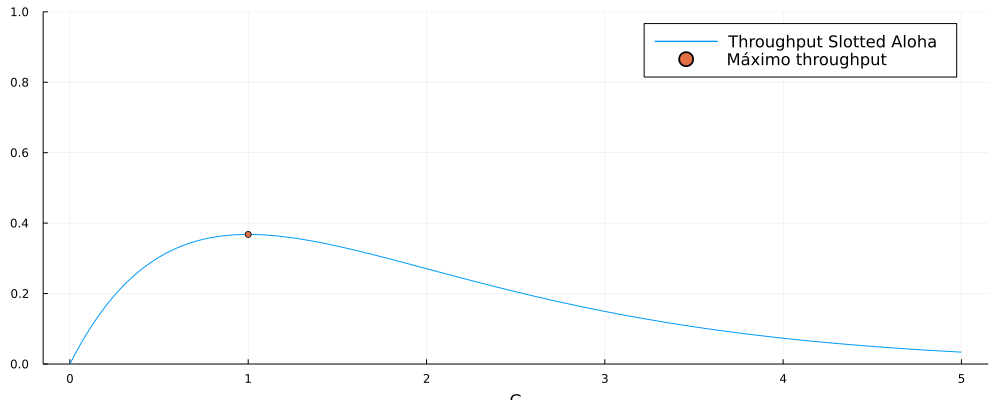

In [2]:
using Plots, LaTeXStrings; default(size=(1000,400), legendfontsize=11)

G=(0:0.01:5)
Thr = G.*exp.(-G)
plot(G,Thr, label="Throughput Slotted Aloha", xlabel="G", ylim=(0,1))
scatter!([1],[exp(-1)], label="Máximo throughput")

### Observaciones

* El throughput se maximiza cuando hay "1 intento por slot"

* A valores bajos de $G$, el throughput crece como $G$, indicando que a baja carga todo el tráfico es atendido.

* A valores altos de $G$, a más intentos menos throughput, porque las colisiones dominan.

* El máximo throughput alcanzable es $e^{-1}\approx 0.37$ (sobre un máximo de $1$ si se coordina)

**Conclusión:** el medio es utilizable de manera descentralizada, pero se paga un precio por la descoordinación

## Modelo de Slotted Aloha en saturación

El primer modelo de Aloha que vimos ilustra las ideas generales, pero es un modelo simplificado. Hagamos un modelo que tenga en cuenta las estaciones participantes. En particular:

> **Modelo de Slotted Aloha:**
>
> * Asumamos que hay $N$ estaciones intentando acceder al medio compartido.
>
> * Cada estación siempre tiene paquetes para transmitir (hipótesis de saturación).
>
> * Las estaciones están en fase de evitar colisiones (intentan acceder con probabilidad $p$)



### Análisis por ciclos

Usaremos una técnica conocida como *análisis por ciclos*. La idea es dividir el tiempo en intervalos independientes, y luego promediar sobre estos intervalos.

En el caso de ALOHA, el intervalo razonable es el slot de duración $T=1$, pero veremos que en otros protocolos conviene tomar intervalos distintos.

**Observación:**

Como hay $N$ estaciones accediendo con probabilidad $p$ cada una, el no. total de transmisiones es $X\sim Bin(N,p)$, es decir:

$$P(X=k) = C^N_k p^k(1-p)^{N-k}, \quad k=0,1,\ldots,N.$$

### Simulación

In [3]:
using Distributions

function simula_aloha(N,p, Tfinal)
    
    K=(1:Tfinal)
    I = zeros(Tfinal)
    S = zeros(Tfinal)
    C = zeros(Tfinal)
    
    d=Binomial(N,p)
    
    for k=1:Tfinal
        
        X = rand(d)
        
        if X==0
            I[k] = 1
        elseif X==1
            S[k] = 1
        else
            C[k] = 1
        end
    end
    
    return K,I,S,C
end

simula_aloha (generic function with 1 method)

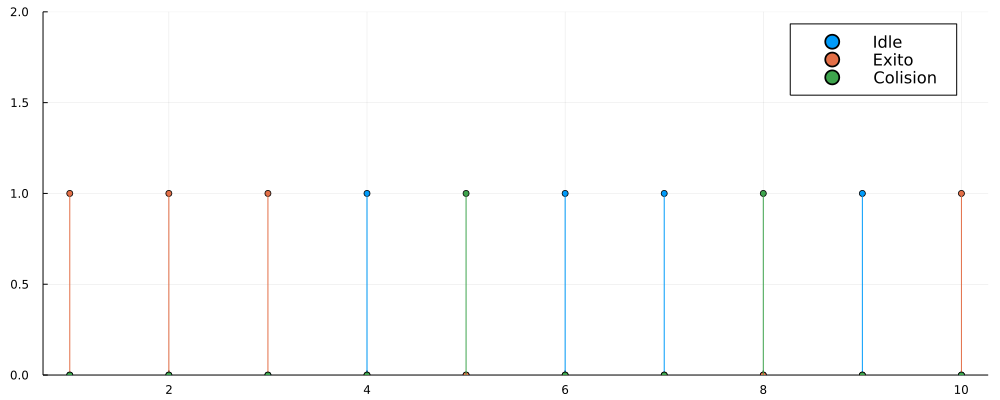

In [4]:
N=5
p=0.2
Tfinal=10
K,I,S,C = simula_aloha(N,p,Tfinal)
plot(K,[I S C], lt=:stem,marker=:circle, label=["Idle" "Exito" "Colision"],ylim=(0,2))

Throughput: 0.4113


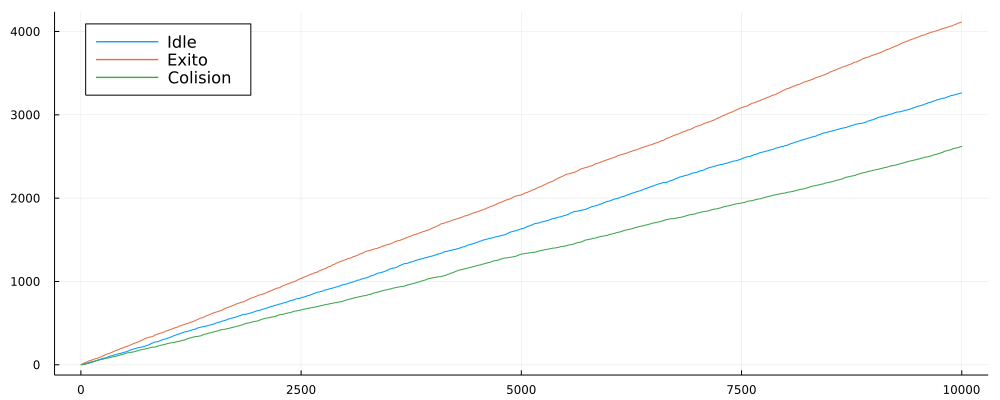

In [5]:
N=5
p=0.2
Tfinal=10000
K,I,S,C = simula_aloha(N,p,Tfinal)
println("Throughput: $(sum(S)/Tfinal)")
plot(K,[cumsum(I) cumsum(S) cumsum(C)],lt=:steppost, label=["Idle" "Exito" "Colision"], legend=:topleft)



### Análisis por ciclos de Slotted Aloha

Separemos el tiempo en ciclos. Sea $L$ la cantidad de paquetes transmitidos con éxito en un ciclo y $T$ la duración del ciclo, entonces:

**Casos:**

 * Slot Idle: si nadie transmite. Probabilidad $P(X=0) = (1-p)^N$.
 * Éxito: si transmite uno solo. Probabilidad $P(X=1) = Np(1-p)^{N-1}$.
 * Colisión: en otro caso.
 
**Tabla de ciclos**:

| Caso  | Prob.  | $L$ | $T$  |
|---|:-----------:|---|---|
| Idle | $$(1-p)^N$$  | $0$  | $1$  |
| Exito | $Np(1-p)^{N-1}$  | $1$ | $1$ |
| Colision | $1-()-()$  | $0$  | $1$  |


### Throughput de saturación de Slotted Aloha

De la tabla anterior concluimos que:

$$\bar{L} = Np(1-p)^{N-1}, \quad \bar{T} = 1$$

De donde el *throughput* de ALOHA se calcula como:

$$Thr = \frac{\bar{L}}{\bar{T}} = Np(1-p)^{N-1}$$

### Ejemplo


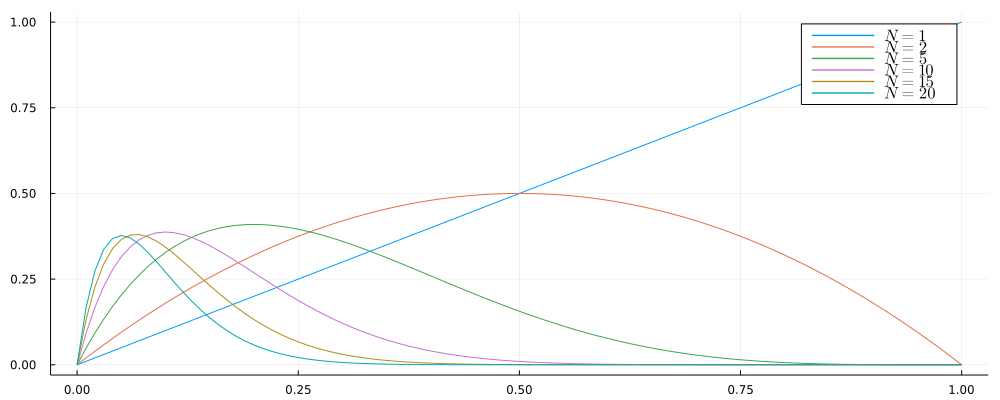

In [6]:
p=0:0.01:1
NN=[1,2,5,10,15,20]
plt=plot()
for N in NN
    plot!(p,N*p.*(1 .-p).^(N-1),label=L"N=%$N")
end
plt

### Probabilidad óptima de acceso

Para maximizar el Throughput, derivamos respecto a $p$ para obtener:

$$\frac{d}{dp} Thr = N(1-p)^{N-1} - N(N-1)p(1-p)^{N-2} = 0$$

Resolviendo para $p\in(0,1)$ se obtiene:

$$(1-p) - (N-1)p = 0 \Rightarrow 1-Np = 0 \Rightarrow p^* =\frac{1}{N}.$$ 

Y sustituyendo se halla el Throughput óptimo:

$$Thr^* = N\frac{1}{N} \left(1-\frac{1}{N}\right)^{N-1} = \left(1-\frac{1}{N}\right)^{N-1}$$

### Comportamiento asintótico

Supongamos que $N\to \infty$ (muchas estaciones transmitiendo) y usamos siempre la probabilidad óptima, entonces:

$$\lim_{N\to\infty} Thr^* = \lim_{N\to\infty} \left(1-\frac{1}{N}\right)^{N-1} = e^{-1}$$

usando el límite tipo $0^\infty$. Recuperamos entonces el throughput límite del análisis simple anterior.

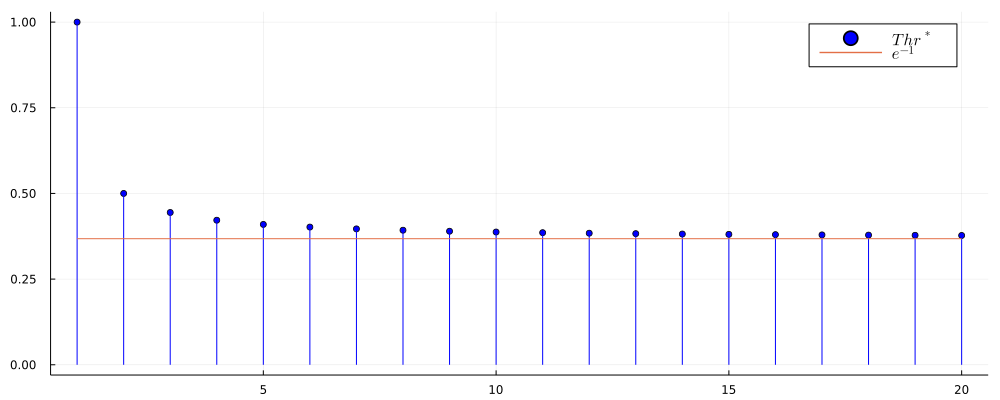

In [7]:
N=(1.0:20)
Thr = (1.0.-(1.0./N)).^(N.-1)

plot(N,Thr,lt=:stem,color=:blue, marker=:circle, label=L"Thr^*")
plot!(N,exp(-1)*ones(size(N)),label=L"e^{-1}")

### Conclusiones

ALOHA fue la primera red que usó un mecanismo de *acceso al medio aleatorio* (random access). Fue una prueba de que, operado correctamente, el sistema podía funcionar.

* Es completamente descentralizado.
* Eligiendo adecuadamente la probabilidad, el throughput no tiende a $0$.
* Podemos evaluar, mediante el análisis por ciclos, la eficiencia del sistema (en condiciones de saturación).

## Carrier Sense Multiple Access

La principal ineficiencia de ALOHA es que los slots son de un tamaño entero de paquete, y si quedan vacíos no se utilizan. La razón es que las estaciones *no pueden saber si el medio está en uso o no*.

**Idea:** escuchar el medio antes de acceder. Solo acceder si el mismo está libre.

Esto permite que se separe el largo del slot *de contención* (donde se compite) del tamaño de transmisión, ya que si alguien accede al medio puede usarlo un tiempo largo sin ser interrumpido. El tiempo no puede ser demasiado largo para permitir rotación entre las estaciones.

Esto lleva al mecanismo **CSMA**.

### Protocolo CSMA

Consideremos el siguiente protocolo:

> **Protocolo CSMA ($p$-persistente)**:
>
> * Cada estación transmite paquetes de largo $L=1$ durante tiempo $T=1$.
>
> * Todas las estaciones escuchan el medio. Cuando este queda libre un tiempo "corto" $\beta<1$:
>
>      * Se divide el tiempo en slots de tamaño $\beta$.
>      * Cada estación intenta acceder en un slot con probabilidad $p$ de forma independiente.
>
> * Si una única estación accede en un slot, gana el acceso sin interrupciones.
>
> * Si dos o más estaciones acceden *en el mismo slot* se produce una colisión, que dura lo mismo que la transmisión.


### Protocolo CSMA: diagrama.

![CSMA](../images/csma.png)

## Ejercicio

1. Realizar un análisis por ciclos, en condiciones de saturación, del protocolo CSMA con $N$ estaciones accediendo con probabilidad $p$.

2. Calcular el Throughput y graficar en función de la probabilidad de acceso.

3. Realizar un simulador de este protocolo.